# [**Understanding Toxicokinetic Variance Using Python**](#Understanding-Toxicokinetic-Variance-Using-Python)
**Name:**       Jacob Ehrhardt

**Course:**     Computational Models for Electronic Structure and Chemical Bonding (CHEM 4PB3)

---

This Jupyter Notebook encompasses the code for the CHEM 4PB3 Final Project


## [Before You Start](#Before-You-Start)
Let's start by installing everything necessary in the background.

In [1]:
# Install necessary libraries/packages/environments
# !conda install -p /opt/anaconda3/envs/myenv ipykernel --update-deps --force-reinstall
!pip install ipykernel
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn
!pip install scipy


# [**Introduction**](#Introduction)
This project blends course content from both **Computational Tools for Chemistry (CHEM 4PB3)** and **Sustainable Chemistry (CHEM 4SC3)**.  
(Toxicokinetics/a dataset using), applied using Python programming in order to *automate data analysis* and leverage the power of *cheminformatics*.

## [Toxicokinetics](#Toxicokinetics)
- *Toxicokinetics* is the study of a toxic chemical's transport from the moment it enters the body, all the way through to when and how it is excreted. 
- It can be neatly broken down into four components:
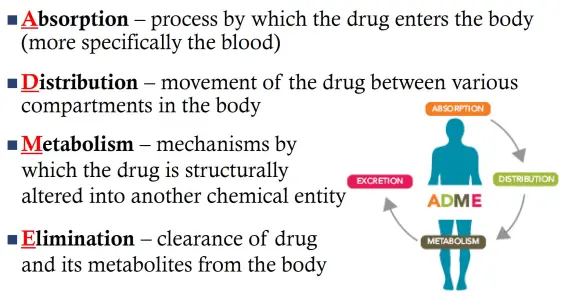
## [The Dataset](#The-Dataset)
- The dataset includes computationally produced toxicokinetic values for 40 chemicals in a simulated environment. It was produced using a model in the EAS-E suite
- [https://arnotresearch.com/eas-e-suite/](https://arnotresearch.com/eas-e-suite/
"EAS-E Suite")

### Here is a summary of the columns/rows in the data set

#### **Rows**
Besides column titles, there are *40* rows that correspond to 40 *Chemicals* with full toxicokinetic data displayed in the columns, along with the chemical's *name* and *CAS number*.

#### **Columns**:
 Each chemical includes toxicokinetic data in humans modeled at three different ages; **3**, **14**, and **25** years old
 
 **Absorption Data**
1. Chemical intake rates (ug/day)
      1. Dietary ingestion	
      2. Ingestion of soil particles	
      3. Drinking water	
      4. Inhalation of outdoor air	
      5. Mouthing ingestion	
      6. Dermal permeation	
      7. Inhalation of indoor air
2. Total chemical absorption (ug/day)

**Distribution Data**
1. Lipid-normalized concentration (ng-chem/g-lipid)
2. Blood concentration (μM)
3. Plasma concentration (μM)
4. Urinary concentration (μM)

**Elimination/Excretion Data**
1. Steady-state total elimination half-life (hour)
2. Relative importance of elimination processes
   1. Egestion
   2. Biotransformation
   3. Respiration
   4. Percutaneous
   5. Renal

### [Loading The Dataset](#loading-the-dataset)

In [2]:
import pandas as pd
from IPython.display import display, HTML
# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx') # This is path to file on my computer, can change to yours.

# Set the maximum number of columns to display to None, which means display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame in a horizontally scrollable format
display(HTML(df.head().to_html()))

# df.head()
# df.info()
# df.describe()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Intake rate (ug/day),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Total chemical absorption (ug/day),Unnamed: 25,Unnamed: 26,Lipid-normalized concentration (ng-chem/g-lipid),Unnamed: 28,Unnamed: 29,Blood concentration (μM),Unnamed: 31,Unnamed: 32,Plasma concentration (μM),Unnamed: 34,Unnamed: 35,Urinary concentration (μM),Unnamed: 37,Unnamed: 38,Steady-state total elimination half-life (hour),Unnamed: 40,Unnamed: 41,Relative importance of elimination processes,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,NaN,NaN,NaN,Age 3,NaN,NaN,NaN,NaN,NaN,NaN,Age 14,NaN,NaN,NaN,NaN,NaN,NaN,Age 25,NaN,NaN,NaN,NaN,NaN,NaN,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,NaN,NaN,NaN,NaN,Age 14,NaN,NaN,NaN,NaN,Age 25,NaN,NaN,NaN,NaN
1,ID,Chemical name,CAS number,Dietary ingestion,Ingestion of soil particles,Drinking water,Inhalation of outdoor air,Mouthing ingestion,Dermal permeation,Inhalation of indoor air,Dietary ingestion,Ingestion of soil particles,Drinking water,Inhalation of outdoor air,Mouthing ingestion,Dermal permeation,Inhalation of indoor air,Dietary ingestion,Ingestion of soil particles,Drinking water,Inhalation of outdoor air,Mouthing ingestion,Dermal permeation,Inhalation of indoor air,TotalAbsorption,TotalAbsorption,TotalAbsorption,LipidNormBodyConc,LipidNormBodyConc,LipidNormBodyConc,BloodConc,BloodConc,BloodConc,PlasmaConc,PlasmaConc,PlasmaConc,UrinaryConc,UrinaryConc,UrinaryConc,SSHL,SSHL,SSHL,Egestion,Biotransformation,Respiration,Percutaneous,Renal,Egestion,Biotransformation,Respiration,Percutaneous,Renal,Egestion,Biotransformation,Respiration,Percutaneous,Renal
2,CHEM1,1-napthol,90-15-3,0.000256,0.000001,0.000001,0.000127,23.27659,38.781081,12.181983,0.00027,0.000001,0.000001,0.000134,8.829556,79.618774,12.885708,0.000334,0.000001,0.000002,0.000166,6.022596,94.703123,15.929399,69.631373,96.486054,110.668348,2.124954,0.98886,0.784491,0.000134,0.000063,0.00005,0.000056,0.000026,0.000021,2.585854,1.208536,0.963577,3.044601,3.045414,3.045465,0.000362,0.999597,0.000004,0.000005,0.000033,0.000071,0.999915,0.000001,0.000003,0.00001,0.000054,0.999934,0.000001,0.000002,0.000009
3,CHEM2,1-phenanthrene,2433-56-9,0.004856,0.000014,0.000055,0.000709,481.132836,52.728651,118.72922,0.005128,0.000014,0.000058,0.000749,184.492497,107.608292,125.587927,0.006344,0.000018,0.000072,0.000926,128.500841,128.582512,155.252641,607.607857,370.410458,353.960763,34.587892,7.073905,4.674018,0.001507,0.00031,0.000206,0.000523,0.000107,0.000071,9.147948,1.878919,1.247632,5.671392,5.673052,5.673156,0.000416,0.999562,0.000001,0.000009,0.000013,0.000081,0.999909,0.0,0.000005,0.000004,0.000062,0.99993,0.0,0.000004,0.000004
4,CHEM3,"2,3,4,5-tetrabromobenzoic acid",27581-13-1,0.029398,0.000004,0.003233,0.001241,5039.141273,0.004222,391.374307,0.031051,0.000004,0.003414,0.001311,1184.828528,0.004135,413.983076,0.038409,0.000005,0.004223,0.001622,736.087245,0.00441,511.768668,4991.734218,1362.87904,983.483167,5112.093007,470.361233,234.241046,0.623424,0.06139,0.033282,0.214371,0.02111,0.011444,120.952102,11.910512,6.457174,102.245333,102.328176,102.345834,0.000117,0.997867,0.0,0.001995,0.000021,0.000025,0.998782,0.0,0.001186,0.000007,0.00002,0.998962,0.0,0.001011,0.000007


# [**Absorption**](#Absorption)

## [A1: Extract Intake Columns](#a1-extract-intake-columns)

In [3]:
# Extracting Intake Rate Columns for Different Age Groups

import pandas as pd

# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx')

# Extract the column names from the first row of the DataFrame
age_3_column_names = df.iloc[1, 3:10].tolist()    # Columns D to J for a 3-year-old
age_14_column_names = df.iloc[1, 10:17].tolist()  # Columns K to Q for a 14-year-old
age_25_column_names = df.iloc[1, 17:24].tolist()  # Columns R to X for a 25-year-old

# Print names of intake rate columns for each age (to confirm we're extracting the correct columns)
print("\033[1m" + "Intake rate column names for a 3-year-old: " + "\033[0m" + str(age_3_column_names))
print("\033[1m" + "Intake rate column names for a 14-year-old: " + "\033[0m" + str(age_14_column_names))
print("\033[1m" + "Intake rate column names for a 25-year-old: " + "\033[0m" + str(age_25_column_names))

Intake rate column names for a 3-year-old: ['Dietary ingestion', 'Ingestion of soil particles', 'Drinking water', 'Inhalation of outdoor air', 'Mouthing ingestion', 'Dermal permeation', 'Inhalation of indoor air']
Intake rate column names for a 14-year-old: ['Dietary ingestion', 'Ingestion of soil particles', 'Drinking water', 'Inhalation of outdoor air', 'Mouthing ingestion', 'Dermal permeation', 'Inhalation of indoor air']
Intake rate column names for a 25-year-old: ['Dietary ingestion', 'Ingestion of soil particles', 'Drinking water', 'Inhalation of outdoor air', 'Mouthing ingestion', 'Dermal permeation', 'Inhalation of indoor air']


There, we succesfully identified and extracted the columns. 

Here are the indicies for future reference.

**Table 1: Column indicies for each age's intake route**
| Intake Route (ug/day)      | Age 3 | Age 14 | Age 25 |
|----------------------------|-------|--------|--------|
| Dietary ingestion          | 3     | 10     | 17     |
| Ingestion of soil particles| 4     | 11     | 18     |
| Drinking water             | 5     | 12     | 19     |
| Inhalation of outdoor air  | 6     | 13     | 20     |
| Mouthing ingestion         | 7     | 14     | 21     |
| Dermal permeation          | 8     | 15     | 22     |
| Inhalation of indoor air   | 9     | 16     | 23     |



Moving onto visualization and data analysis...[A2: Absorption Visualization][def]

[def]: #a2-absorption-visualization

## [A2: Absorption Visualization](#a2-absorption-visualization)
In order to visualize absorption, we will create box plots for each of the 7 *intake routes*, comparing *intake rates* against all *three ages*.

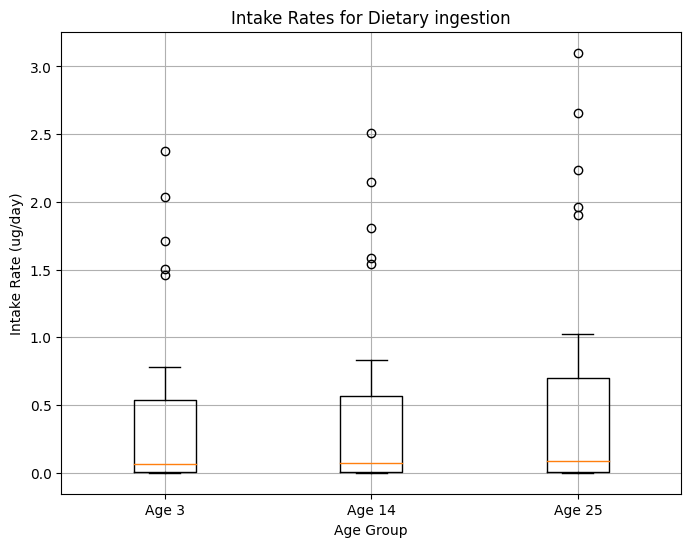

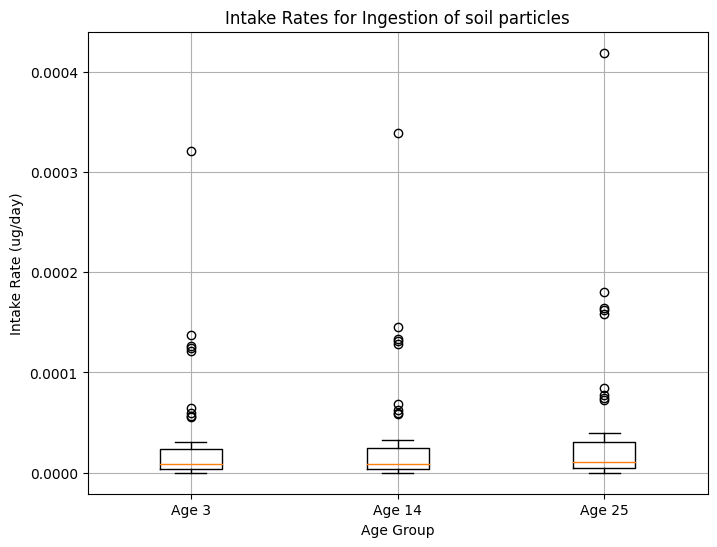

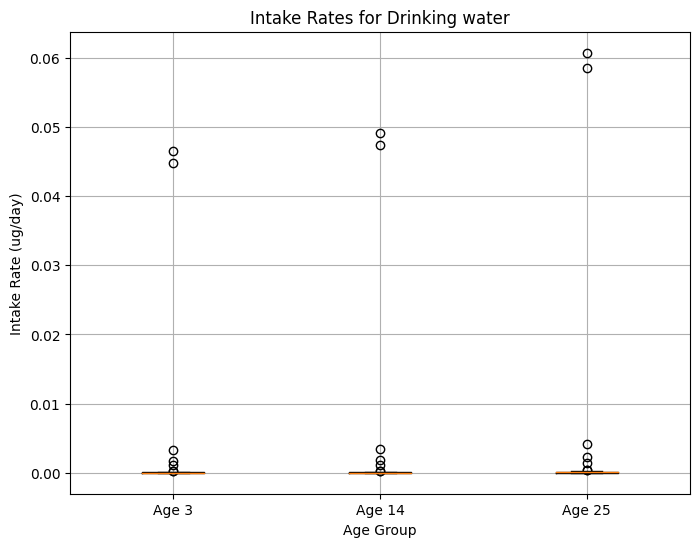

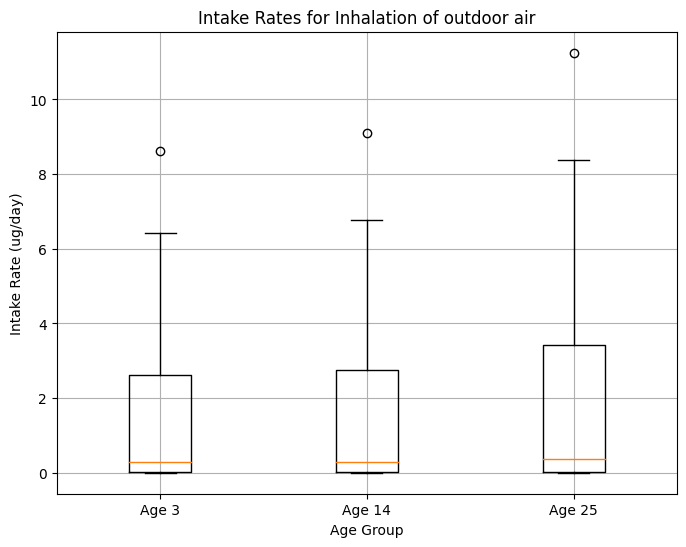

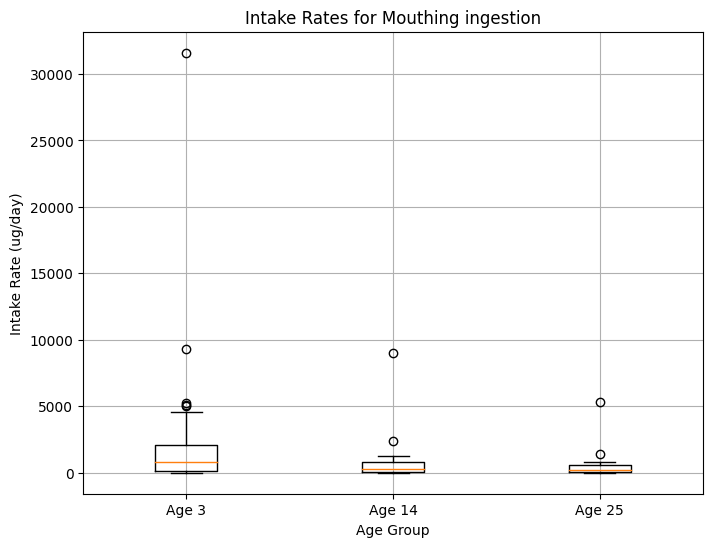

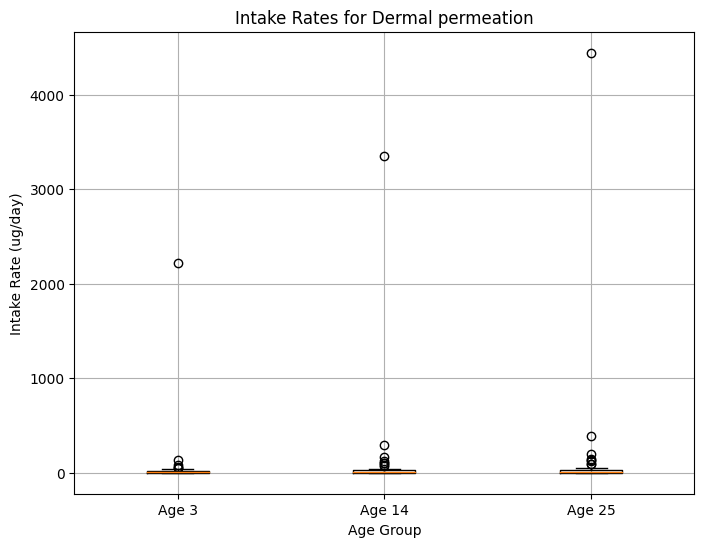

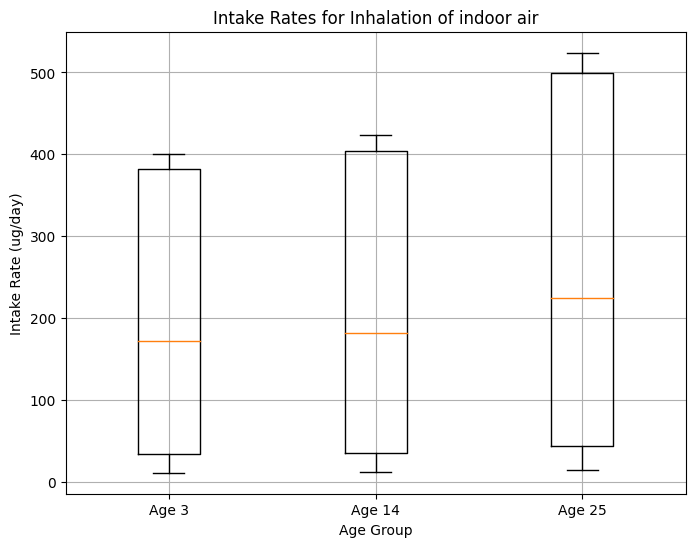

In [4]:
# Creating the Box PLots

import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx', skiprows=2)

# Extract the column names from the first row of the DataFrame
intake_data_age_3 = df.iloc[:, 3:10]    # Columns for a 3-year-old
intake_data_age_14 = df.iloc[:, 10:17]  # Columns for a 14-year-old
intake_data_age_25 = df.iloc[:, 17:24]  # Columns for a 25-year-old


# Create a separate box plot for each chemical
for pathway in intake_data_age_3.columns:
    plt.figure(figsize=(8, 6))
    bp = plt.boxplot([
        intake_data_age_3[pathway].astype(float),
        intake_data_age_14[pathway + '.1'].astype(float),
        intake_data_age_25[pathway + '.2'].astype(float)
    ], labels=['Age 3', 'Age 14', 'Age 25'])

     # Highlight outliers in red
    outliers = [flier.get_ydata() for flier in bp['fliers']]
    for flier in bp['fliers']:
        flier.set(marker='o', alpha=1)

    plt.title(f'Intake Rates for {pathway}')
    plt.xlabel('Age Group')
    plt.ylabel('Intake Rate (ug/day)')
    plt.grid(True)
    plt.show()


From this we noticed two general trends

1. As age increases, daily intake rate increases (6/7)
        Makes sense... as we get bigger we ingest more
2. Outlier is "Mouthing Ingestion", in which the trend is reversed, with a steep dropoff after age 3

Now we will zoom in further to quantify the relationship and do statistical analysis

First starting with dermal absorption, who's outlier was very clearly linear

In [6]:
import pandas as pd
import scipy.stats as stats

# Load your data
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx', skiprows=2)
# Initialize results as an empty DataFrame with the appropriate column names
results = pd.DataFrame(columns=['Route', 'F Value', 'P Value', 'Significant'])

# Define the intake routes and age groups
intake_routes = ['Dietary ingestion', 'Ingestion of soil particles', 'Drinking water', 'Inhalation of outdoor air', 'Mouthing ingestion', 'Dermal permeation', 'Inhalation of indoor air']
age_groups = [intake_data_age_3, intake_data_age_14, intake_data_age_25]

# Perform ANOVA for each intake route
significant_routes = []
for i, route in enumerate(intake_routes):
    f_value, p_value = stats.f_oneway(*(age_group.iloc[:, i] for age_group in age_groups))
    is_significant = 'YES' if p_value < 0.05 else 'NO'
    results.loc[i] = [route, f_value, p_value, is_significant]
    if p_value < 0.05:
        significant_routes.append(route)

# Remove the indices from the DataFrame string
results_str = str(results)
results_str = '\n'.join([i.split(' ', 1)[1] for i in results_str.split('\n')])

print(results_str)

# Print an automated response
if significant_routes:
    print(f"\nTherefore, age \033[1mIS\033[0m statistically significant in the intake rate of a chemical through {', '.join(significant_routes)}.")
else:
    print("\nTherefore, age \033[1mIS NOT\033[0m statistically significant in the intake rate of a chemical through any intake pathway.")

                        Route   F Value   P Value Significant
           Dietary ingestion  0.324233  0.723730          NO
 Ingestion of soil particles  0.246273  0.782113          NO
              Drinking water  0.050692  0.950592          NO
   Inhalation of outdoor air  0.388918  0.678663          NO
          Mouthing ingestion  4.237896  0.016715         YES
           Dermal permeation  0.202658  0.816843          NO
    Inhalation of indoor air  1.268227  0.285168          NO

Therefore, age IS statistically significant in the intake rate of a chemical through Mouthing ingestion.


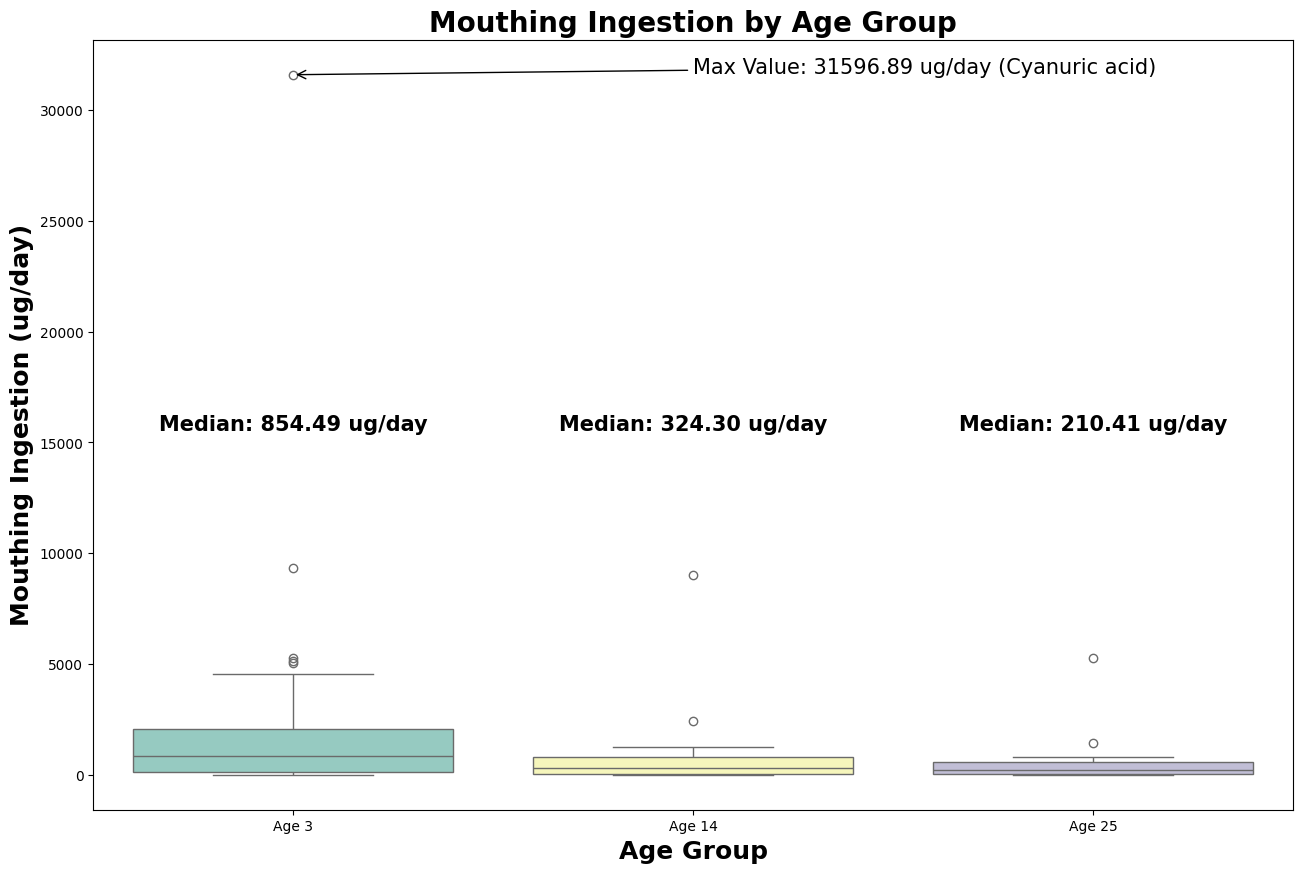

In [7]:
# Better visualization of Mouthing Ingestion
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx', skiprows=2)

# Select the mouthing ingestion data for each age group
mouthing_age_3 = df.iloc[2:, 7].astype(float)  # Age 3
mouthing_age_14 = df.iloc[2:, 14].astype(float)  # Age 14
mouthing_age_25 = df.iloc[2:, 21].astype(float)  # Age 25

# Create box plot
fig = plt.figure(figsize=(15, 10))
box_plot = sns.boxplot(data=[mouthing_age_3, mouthing_age_14, mouthing_age_25], palette="Set3")

# Adjust the position of the plot
plt.subplots_adjust(left=0.1, right=0.9)

# Set x and y axis labels
plt.xlabel('Age Group', weight='bold', fontsize=18)
plt.ylabel('Mouthing Ingestion (ug/day)', weight='bold', fontsize=18)

# Change outlier markers to red
for i, artist in enumerate(box_plot.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = box_plot.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

# Perform pairwise comparisons and add annotations for significant differences
p_values = []
for data in [mouthing_age_3, mouthing_age_14, mouthing_age_25]:
    p_values.append(stats.shapiro(data)[1])
alpha = 0.05
if all(p > alpha for p in p_values):
    # If all groups have normal distribution, perform ANOVA
    f_val, p_val = stats.f_oneway(mouthing_age_3, mouthing_age_14, mouthing_age_25)
    if p_val < alpha:
        # If ANOVA p-value is significant, perform Tukey's HSD test
        from statsmodels.stats.multicomp import pairwise_tukeyhsd

        data = np.concatenate([mouthing_age_3, mouthing_age_14, mouthing_age_25])
        labels = ['Age 3'] * len(mouthing_age_3) + ['Age 14'] * len(mouthing_age_14) + ['Age 25'] * len(mouthing_age_25)
        tukey_results = pairwise_tukeyhsd(data, labels, alpha=0.05)
        print(tukey_results)

        # Add annotations for significant differences
        sig_diffs = tukey_results.reject
        for i, sig_diff in enumerate(sig_diffs):
            if sig_diff:
                plt.text(i, 0.5, '*', horizontalalignment='center', verticalalignment='center', fontsize=12, color='black')

# Calculate descriptive statistics (median) for each age group
median_age_3 = mouthing_age_3.median()
median_age_14 = mouthing_age_14.median()
median_age_25 = mouthing_age_25.median()

# Add annotation for max point with chemical name and without age group
max_value = max(mouthing_age_3.max(), mouthing_age_14.max(), mouthing_age_25.max())
max_group = ''
if max_value == mouthing_age_3.max():
    max_group = 'Age 3'
elif max_value == mouthing_age_14.max():
    max_group = 'Age 14'
else:
    max_group = 'Age 25'
# Move the annotation further away from the max point (to enhance readability)
plt.annotate(f'Max Value: {max_value:.2f} ug/day (Cyanuric acid)', xy=(0, max_value), xytext=(1, max_value + 50),
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=15)

# Calculate the middle value of the y-axis for the mean annotations
middle_y = (plt.ylim()[0] + plt.ylim()[1]) / 2

# Display median values with units
plt.text(0, middle_y, f'Median: {median_age_3:.2f} ug/day', horizontalalignment='center', verticalalignment='center', fontsize=15, weight='bold')
plt.text(1, middle_y, f'Median: {median_age_14:.2f} ug/day', horizontalalignment='center', verticalalignment='center', fontsize=15, weight='bold')
plt.text(2, middle_y, f'Median: {median_age_25:.2f} ug/day', horizontalalignment='center', verticalalignment='center', fontsize=15, weight='bold')


# Rename x-axis labels
plt.xticks([0, 1, 2], ['Age 3', 'Age 14', 'Age 25'])

# Add title at the top
plt.title('Mouthing Ingestion by Age Group', weight='bold', fontsize=20)

plt.show()

## [A3: Total Intake vs Total Absorption](#A3-total-intake-vs-total-absorption)

Age Group  Total Combined Intake Rate (ug/day)  Total Chemical Absorption (ug/day)
    Age 3                            103262.31                            58124.37
   Age 14                             40267.94                            25343.87
   Age 25                             33825.71                            22851.04


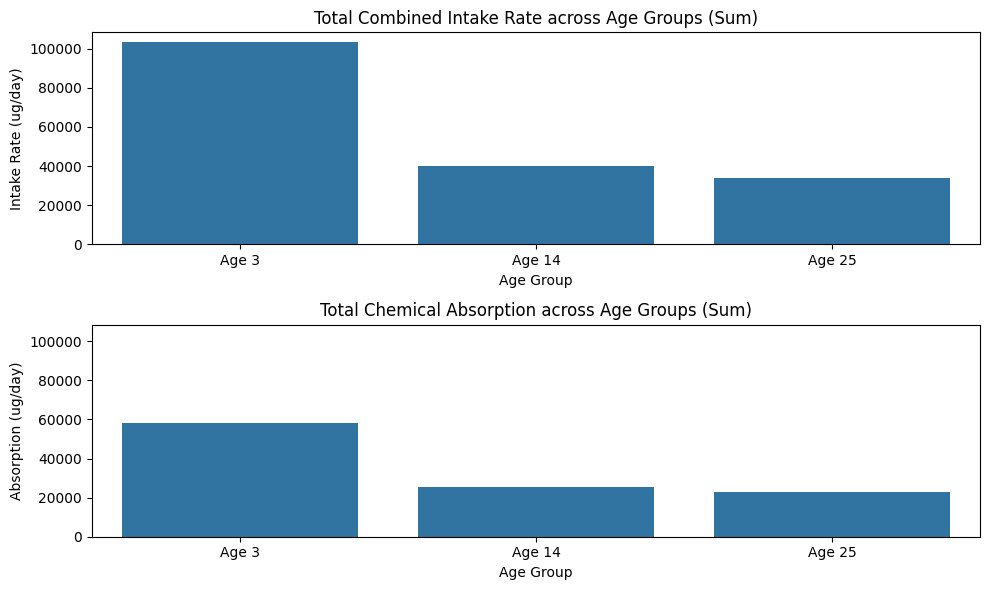

<class 'list'> [0, 1, 2]
<class 'list'> [103262.31, 40267.94, 33825.71]
<class 'list'> [58124.37, 25343.87, 22851.04]
Regression Analysis Results:
Intake Rate = -34718.30 * Age + 93836.95
Absorption = -17636.67 * Age + 53076.43
Correlation between Intake Rate and Absorption: 0.9997858009627572
Correlation between Intake Rate and Absorption: 0.9997858009627572


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx')

# Calculate the total combined intake rates for each age group
total_intake_age_3 = df.iloc[2:, 3:10].sum(axis=1)  # Sum across intake rate columns for Age 3
total_intake_age_14 = df.iloc[2:, 10:17].sum(axis=1)  # Sum across intake rate columns for Age 14
total_intake_age_25 = df.iloc[2:, 17:24].sum(axis=1)  # Sum across intake rate columns for Age 25

# Extract the total chemical absorption values for each age group
total_absorption_age_3 = df.iloc[2:, 24] 
total_absorption_age_14 = df.iloc[2:, 25]  
total_absorption_age_25 = df.iloc[2:, 26]  


# Create a DataFrame to display the results in tabular form
results_df = pd.DataFrame({
    'Age Group': ['Age 3', 'Age 14', 'Age 25'],
    'Total Combined Intake Rate (ug/day)': [total_intake_age_3.sum(), total_intake_age_14.sum(), total_intake_age_25.sum()],
    'Total Chemical Absorption (ug/day)': [total_absorption_age_3.sum(), total_absorption_age_14.sum(), total_absorption_age_25.sum()]
})


# Display the results DataFrame
pd.set_option('display.width', 1000)
results_df = results_df.round(2)
print(results_df.to_string(index=False))

# Create DataFrames for intake rate and absorption using sum values
intake_data_sum = results_df

# Visualize the data using bar plots
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
sns.barplot(x='Age Group', y='Total Combined Intake Rate (ug/day)', data=intake_data_sum)
plt.title('Total Combined Intake Rate across Age Groups (Sum)')
plt.ylabel('Intake Rate (ug/day)')
y_min, y_max = plt.ylim()  # Get the limits of y-axis from the first plot

plt.subplot(2, 1, 2)
sns.barplot(x='Age Group', y='Total Chemical Absorption (ug/day)', data=intake_data_sum)
plt.title('Total Chemical Absorption across Age Groups (Sum)')
plt.ylabel('Absorption (ug/day)')
plt.ylim(y_min, y_max)  # Set the limits of y-axis to be the same as the first plot
plt.tight_layout()
plt.show()

# Drop rows with NaN values from the DataFrame
results_df = results_df.dropna()

# Conduct regression analysis to quantify the relationship between age and intake rate/absorption
x = results_df.index.tolist()
y_intake = results_df['Total Combined Intake Rate (ug/day)'].tolist()
y_absorption = results_df['Total Chemical Absorption (ug/day)'].tolist()

# Check the types and values of x, y_intake, and y_absorption
print(type(x), x)
print(type(y_intake), y_intake)
print(type(y_absorption), y_absorption)

slope_intake, intercept_intake, _, _, _ = linregress(x, y_intake)
slope_absorption, intercept_absorption, _, _, _ = linregress(x, y_absorption)

print("Regression Analysis Results:")
print(f"Intake Rate = {slope_intake:.2f} * Age + {intercept_intake:.2f}")
print(f"Absorption = {slope_absorption:.2f} * Age + {intercept_absorption:.2f}")

# Explore correlations between intake rate and absorption
correlation = results_df['Total Combined Intake Rate (ug/day)'].corr(results_df['Total Chemical Absorption (ug/day)'])
print("Correlation between Intake Rate and Absorption:", correlation)

# Check if both series contain more than one value
if len(results_df['Total Combined Intake Rate (ug/day)']) > 1 and len(results_df['Total Chemical Absorption (ug/day)']) > 1:
    correlation = results_df['Total Combined Intake Rate (ug/day)'].corr(results_df['Total Chemical Absorption (ug/day)'])
    print("Correlation between Intake Rate and Absorption:", correlation)
else:
    print("Cannot compute correlation: one or both series contain only a single value")

# [**Distribution**](#Distribution)

In [24]:
# For my reference, so I can get the column indicies closer for reference
import pandas as pd
from IPython.display import display, HTML
# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx')

# Set the maximum number of columns to display to None, which means display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame in a horizontally scrollable format
display(HTML(df.head().to_html()))

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Intake rate (ug/day),Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Total chemical absorption (ug/day),Unnamed: 25,Unnamed: 26,Lipid-normalized concentration (ng-chem/g-lipid),Unnamed: 28,Unnamed: 29,Blood concentration (μM),Unnamed: 31,Unnamed: 32,Plasma concentration (μM),Unnamed: 34,Unnamed: 35,Urinary concentration (μM),Unnamed: 37,Unnamed: 38,Steady-state total elimination half-life (hour),Unnamed: 40,Unnamed: 41,Relative importance of elimination processes,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,NaN,NaN,NaN,Age 3,NaN,NaN,NaN,NaN,NaN,NaN,Age 14,NaN,NaN,NaN,NaN,NaN,NaN,Age 25,NaN,NaN,NaN,NaN,NaN,NaN,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,Age 14,Age 25,Age 3,NaN,NaN,NaN,NaN,Age 14,NaN,NaN,NaN,NaN,Age 25,NaN,NaN,NaN,NaN
1,ID,Chemical name,CAS number,Dietary ingestion,Ingestion of soil particles,Drinking water,Inhalation of outdoor air,Mouthing ingestion,Dermal permeation,Inhalation of indoor air,Dietary ingestion,Ingestion of soil particles,Drinking water,Inhalation of outdoor air,Mouthing ingestion,Dermal permeation,Inhalation of indoor air,Dietary ingestion,Ingestion of soil particles,Drinking water,Inhalation of outdoor air,Mouthing ingestion,Dermal permeation,Inhalation of indoor air,TotalAbsorption,TotalAbsorption,TotalAbsorption,LipidNormBodyConc,LipidNormBodyConc,LipidNormBodyConc,BloodConc,BloodConc,BloodConc,PlasmaConc,PlasmaConc,PlasmaConc,UrinaryConc,UrinaryConc,UrinaryConc,SSHL,SSHL,SSHL,Egestion,Biotransformation,Respiration,Percutaneous,Renal,Egestion,Biotransformation,Respiration,Percutaneous,Renal,Egestion,Biotransformation,Respiration,Percutaneous,Renal
2,CHEM1,1-napthol,90-15-3,0.000256,0.000001,0.000001,0.000127,23.27659,38.781081,12.181983,0.00027,0.000001,0.000001,0.000134,8.829556,79.618774,12.885708,0.000334,0.000001,0.000002,0.000166,6.022596,94.703123,15.929399,69.631373,96.486054,110.668348,2.124954,0.98886,0.784491,0.000134,0.000063,0.00005,0.000056,0.000026,0.000021,2.585854,1.208536,0.963577,3.044601,3.045414,3.045465,0.000362,0.999597,0.000004,0.000005,0.000033,0.000071,0.999915,0.000001,0.000003,0.00001,0.000054,0.999934,0.000001,0.000002,0.000009
3,CHEM2,1-phenanthrene,2433-56-9,0.004856,0.000014,0.000055,0.000709,481.132836,52.728651,118.72922,0.005128,0.000014,0.000058,0.000749,184.492497,107.608292,125.587927,0.006344,0.000018,0.000072,0.000926,128.500841,128.582512,155.252641,607.607857,370.410458,353.960763,34.587892,7.073905,4.674018,0.001507,0.00031,0.000206,0.000523,0.000107,0.000071,9.147948,1.878919,1.247632,5.671392,5.673052,5.673156,0.000416,0.999562,0.000001,0.000009,0.000013,0.000081,0.999909,0.0,0.000005,0.000004,0.000062,0.99993,0.0,0.000004,0.000004
4,CHEM3,"2,3,4,5-tetrabromobenzoic acid",27581-13-1,0.029398,0.000004,0.003233,0.001241,5039.141273,0.004222,391.374307,0.031051,0.000004,0.003414,0.001311,1184.828528,0.004135,413.983076,0.038409,0.000005,0.004223,0.001622,736.087245,0.00441,511.768668,4991.734218,1362.87904,983.483167,5112.093007,470.361233,234.241046,0.623424,0.06139,0.033282,0.214371,0.02111,0.011444,120.952102,11.910512,6.457174,102.245333,102.328176,102.345834,0.000117,0.997867,0.0,0.001995,0.000021,0.000025,0.998782,0.0,0.001186,0.000007,0.00002,0.998962,0.0,0.001011,0.000007


In [26]:
# Distribution - Lipid-Normalized Concentration - Descriptive Statistics
import pandas as pd
from scipy import stats

# Assuming df contains dataset with the distribution concentrations
# Extract columns for lipid-normalized concentration for each age group
lipid_normalized_age_3 = df.iloc[2:, 27]  # Column 27
lipid_normalized_age_14 = df.iloc[2:, 28]  # Column 28
lipid_normalized_age_25 = df.iloc[2:, 29]  # Column 29

# Calculate descriptive statistics for each age group
descriptive_stats_age_3 = lipid_normalized_age_3.describe()
descriptive_stats_age_14 = lipid_normalized_age_14.describe()
descriptive_stats_age_25 = lipid_normalized_age_25.describe()

# Calculate descriptive statistics (median) for each age group
median_age_3 = lipid_normalized_age_3.median()
median_age_14 = lipid_normalized_age_14.median()
median_age_25 = lipid_normalized_age_25.median()

# Calculate descriptive statistics (mean) for each age group
mean_age_3 = lipid_normalized_age_3.mean()
mean_age_14 = lipid_normalized_age_14.mean()
mean_age_25 = lipid_normalized_age_25.mean()


# Print the descriptive statistics for each age group
print("Descriptive Statistics for Lipid-Normalized Concentration (Age 3):\n", descriptive_stats_age_3)
print("Median for Age 3:", median_age_3)
print("Mean for Age 3:", mean_age_3)
print("\nDescriptive Statistics for Lipid-Normalized Concentration (Age 14):\n", descriptive_stats_age_14)
print("Median for Age 14:", median_age_14)
print("Mean for Age 14:", mean_age_14)
print("\nDescriptive Statistics for Lipid-Normalized Concentration (Age 25):\n", descriptive_stats_age_25)
print("Median for Age 25:", median_age_25)
print("Mean for Age 25:", mean_age_25)



Descriptive Statistics for Lipid-Normalized Concentration (Age 3):
 count     40.000000
unique    40.000000
top        2.124954
freq       1.000000
Name: Lipid-normalized concentration (ng-chem/g-lipid), dtype: float64
Median for Age 3: 388.4373597761369
Mean for Age 3: 31245.401425206983

Descriptive Statistics for Lipid-Normalized Concentration (Age 14):
 count     40.00000
unique    40.00000
top        0.98886
freq       1.00000
Name: Unnamed: 28, dtype: float64
Median for Age 14: 57.847378980780285
Mean for Age 14: 26921.888618454475

Descriptive Statistics for Lipid-Normalized Concentration (Age 25):
 count     40.000000
unique    40.000000
top        0.784491
freq       1.000000
Name: Unnamed: 29, dtype: float64
Median for Age 25: 37.871509602807905
Mean for Age 25: 19556.430095790813


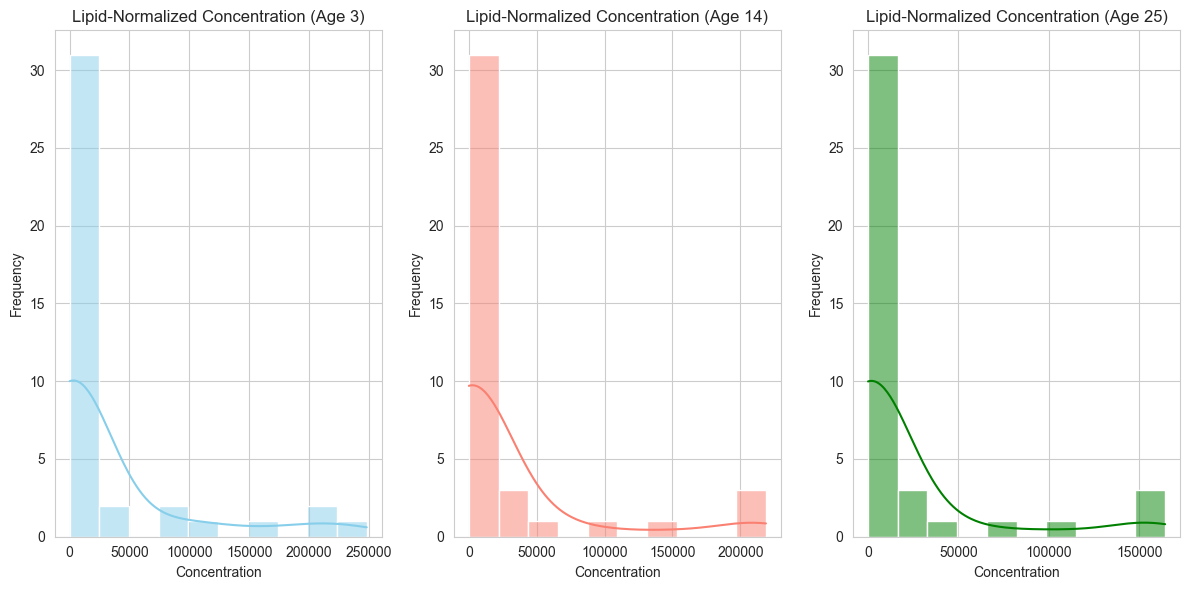

In [27]:
# Distribution - Lipid-Normalized Concentration - Histograms
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plots
sns.set_style("whitegrid")

# Plot histograms for each age group
plt.figure(figsize=(12, 6))

# Age 3
plt.subplot(1, 3, 1)
sns.histplot(df.iloc[2:, 27].astype(float), bins=10, kde=True, color='skyblue')
plt.title('Lipid-Normalized Concentration (Age 3)')
plt.xlabel('Concentration')
plt.ylabel('Frequency')

# Age 14
plt.subplot(1, 3, 2)
sns.histplot(df.iloc[2:, 28].astype(float), bins=10, kde=True, color='salmon')
plt.title('Lipid-Normalized Concentration (Age 14)')
plt.xlabel('Concentration')
plt.ylabel('Frequency')

# Age 25
plt.subplot(1, 3, 3)
sns.histplot(df.iloc[2:, 29].astype(float), bins=10, kde=True, color='green')
plt.title('Lipid-Normalized Concentration (Age 25)')
plt.xlabel('Concentration')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


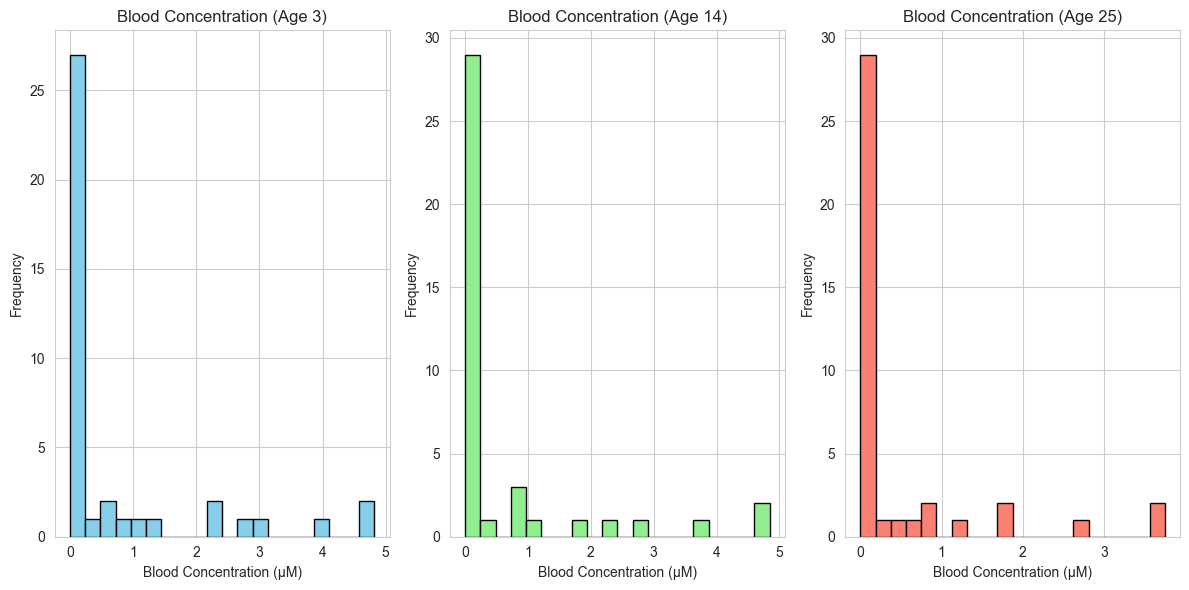

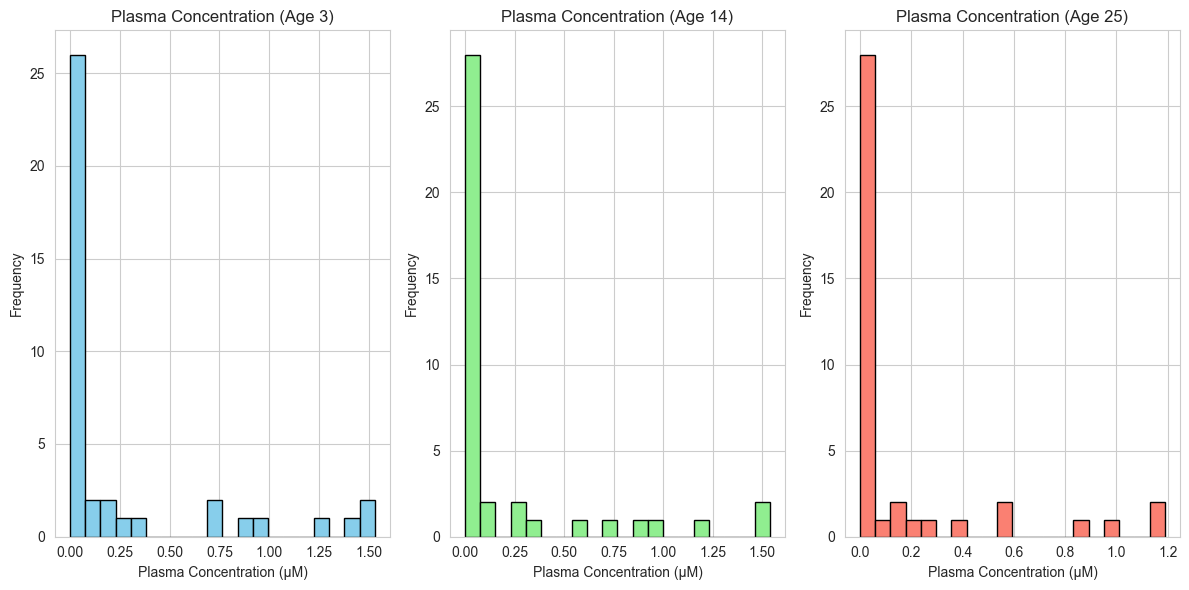

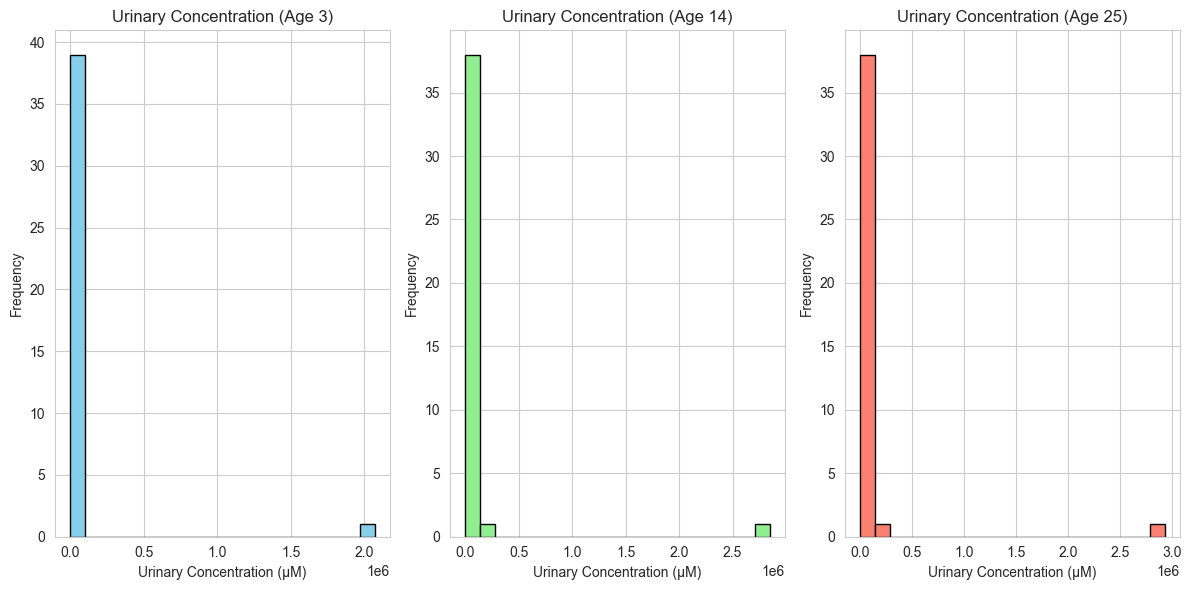

In [28]:
# Histograms for blood + plasma + urine
# Distribution - Blood concentration - Histograms
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set_style("whitegrid")

# Select blood concentration data for each age group
blood_concentration_age_3 = df.iloc[2:, 30]  # Column index 30 for age 3
blood_concentration_age_14 = df.iloc[2:, 31]  # Column index 31 for age 14
blood_concentration_age_25 = df.iloc[2:, 32]  # Column index 32 for age 25

# Plot histograms for blood concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(blood_concentration_age_3.astype(float), bins=20, color='skyblue', edgecolor='black')
plt.title('Blood Concentration (Age 3)')
plt.xlabel('Blood Concentration (μM)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(blood_concentration_age_14.astype(float), bins=20, color='lightgreen', edgecolor='black')
plt.title('Blood Concentration (Age 14)')
plt.xlabel('Blood Concentration (μM)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(blood_concentration_age_25.astype(float), bins=20, color='salmon', edgecolor='black')
plt.title('Blood Concentration (Age 25)')
plt.xlabel('Blood Concentration (μM)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Select plasma concentration data for each age group
plasma_concentration_age_3 = df.iloc[2:, 33]  # Replace with the correct column index for age 3
plasma_concentration_age_14 = df.iloc[2:, 34]  # Replace with the correct column index for age 14
plasma_concentration_age_25 = df.iloc[2:, 35]  # Replace with the correct column index for age 25

# Plot histograms for plasma concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(plasma_concentration_age_3.astype(float), bins=20, color='skyblue', edgecolor='black')
plt.title('Plasma Concentration (Age 3)')
plt.xlabel('Plasma Concentration (μM)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(plasma_concentration_age_14.astype(float), bins=20, color='lightgreen', edgecolor='black')
plt.title('Plasma Concentration (Age 14)')
plt.xlabel('Plasma Concentration (μM)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(plasma_concentration_age_25.astype(float), bins=20, color='salmon', edgecolor='black')
plt.title('Plasma Concentration (Age 25)')
plt.xlabel('Plasma Concentration (μM)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Select urinary concentration data for each age group
urinary_concentration_age_3 = df.iloc[2:, 36]  # Replace with the correct column index for age 3
urinary_concentration_age_14 = df.iloc[2:, 37]  # Replace with the correct column index for age 14
urinary_concentration_age_25 = df.iloc[2:, 38]  # Replace with the correct column index for age 25

# Plot histograms for urinary concentration
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(urinary_concentration_age_3.astype(float), bins=20, color='skyblue', edgecolor='black')
plt.title('Urinary Concentration (Age 3)')
plt.xlabel('Urinary Concentration (μM)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(urinary_concentration_age_14.astype(float), bins=20, color='lightgreen', edgecolor='black')
plt.title('Urinary Concentration (Age 14)')
plt.xlabel('Urinary Concentration (μM)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(urinary_concentration_age_25.astype(float), bins=20, color='salmon', edgecolor='black')
plt.title('Urinary Concentration (Age 25)')
plt.xlabel('Urinary Concentration (μM)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Histograms reveal:
1. Age does not seem to have an impact on distribution
2. Majority (>60%) of frequencies are in the lowest bin. However...
   1. Lipid, blood, and plasma phases have the remaining bins relatively evenly distributed from low to high concentration after the lowest bin.
   2. Urine has only the lowest one (Age 3) or two (Ages 14 and 25) bins occupied, leaving the last bin at the other side of the x-axis (high concentration)


Further investigation is warranted. Therefore we will look to see if these phases have a relationship with eachother

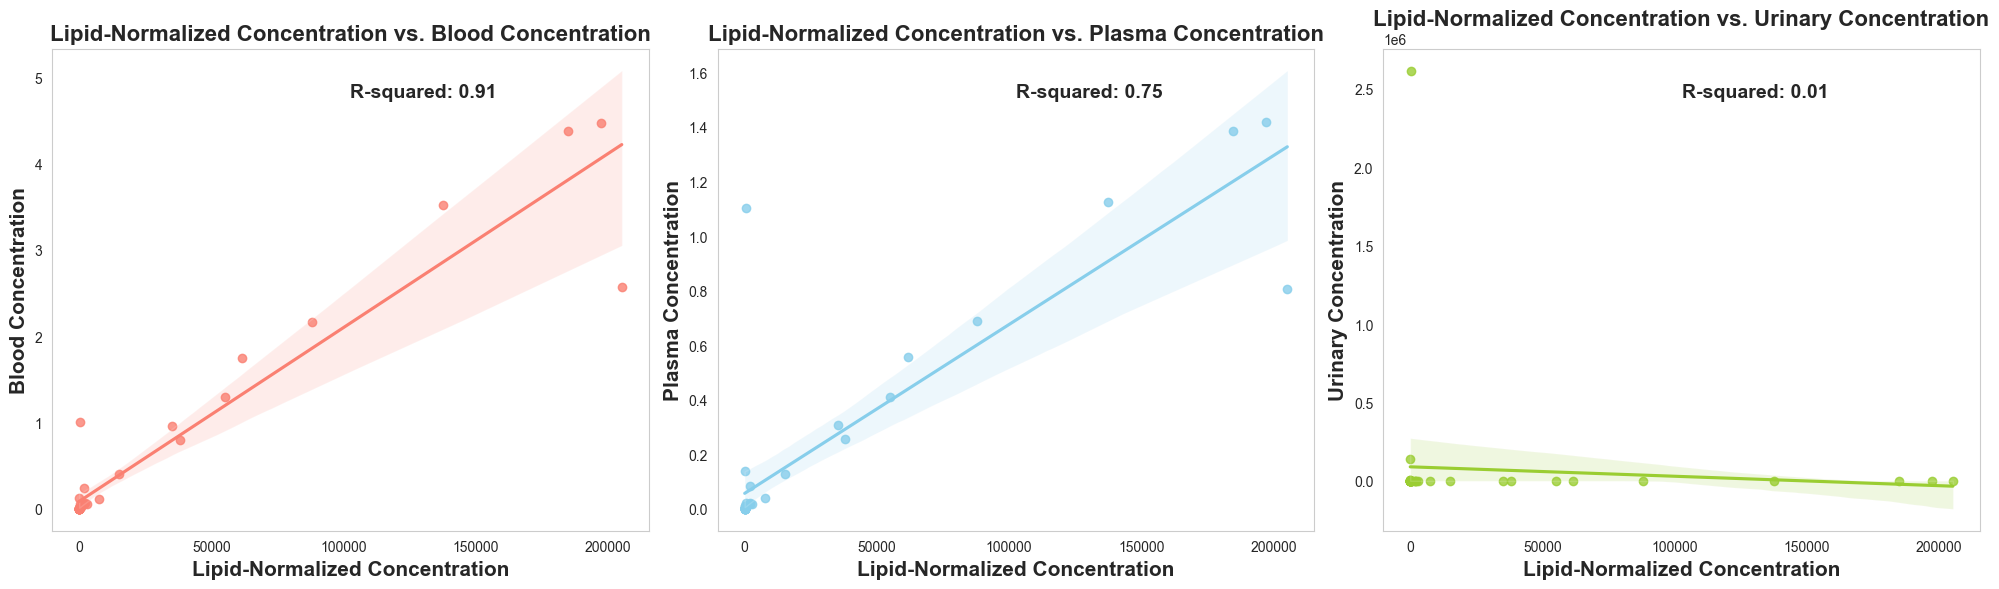

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx', skiprows=2)

# Extract columns for analysis
lipid_normalized = df.iloc[2:, 27:30].mean(axis=1)
blood_concentration = df.iloc[2:, 30:33].mean(axis=1)
plasma_concentration = df.iloc[2:, 33:36].mean(axis=1)
urinary_concentration = df.iloc[2:, 36:39].mean(axis=1)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Lipid-normalized vs. Blood concentration
sns.regplot(x=lipid_normalized, y=blood_concentration, ax=axes[0], color='salmon')
axes[0].set_title('Lipid-Normalized Concentration vs. Blood Concentration', fontsize=16, weight='bold')
axes[0].set_xlabel('Lipid-Normalized Concentration', fontsize=15, weight='bold')
axes[0].set_ylabel('Blood Concentration', fontsize=15, weight='bold')
r_squared = lipid_normalized.corr(blood_concentration)**2
axes[0].text(0.5, 0.9, f'R-squared: {r_squared:.2f}', fontsize=14, transform=axes[0].transAxes, weight='bold')
axes[0].grid(False)  # Remove gridlines

# Lipid-normalized vs. Plasma concentration
sns.regplot(x=lipid_normalized, y=plasma_concentration, ax=axes[1], color='skyblue')
axes[1].set_title('Lipid-Normalized Concentration vs. Plasma Concentration', fontsize=16, weight='bold')
axes[1].set_xlabel('Lipid-Normalized Concentration', fontsize=15, weight='bold')
axes[1].set_ylabel('Plasma Concentration', fontsize=15, weight='bold')
r_squared = lipid_normalized.corr(plasma_concentration)**2
axes[1].text(0.5, 0.9, f'R-squared: {r_squared:.2f}', fontsize=14, transform=axes[1].transAxes, weight='bold')
axes[1].grid(False)  # Remove gridlines

# Lipid-normalized vs. Urinary concentration
sns.regplot(x=lipid_normalized, y=urinary_concentration, ax=axes[2], color='yellowgreen')
axes[2].set_title('Lipid-Normalized Concentration vs. Urinary Concentration', fontsize=16, weight='bold')
axes[2].set_xlabel('Lipid-Normalized Concentration', fontsize=15, weight='bold')
axes[2].set_ylabel('Urinary Concentration', fontsize=15, weight='bold')
r_squared = lipid_normalized.corr(urinary_concentration)**2
axes[2].text(0.5, 0.9, f'R-squared: {r_squared:.2f}', fontsize=14, transform=axes[2].transAxes, weight='bold')
axes[2].grid(False)  # Remove gridlines

plt.tight_layout()
plt.show()

In [33]:
import pandas as pd

# Read the Excel file
df = pd.read_excel('/Users/jacobehrhardt/Desktop/C4PB3/Final_C4PB3/Tkhwk.xlsx', skiprows=2)

mouthing_ingestion_age_3 = df.iloc[2:, 7].astype(float)
mouthing_ingestion_age_14 = df.iloc[2:, 14].astype(float)
mouthing_ingestion_age_25 = df.iloc[2:, 21].astype(float)
dermal_permeation_age_3 = df.iloc[2:, 8].astype(float)
dermal_permeation_age_14 = df.iloc[2:, 15].astype(float)
dermal_permeation_age_25 = df.iloc[2:, 22].astype(float)

# Get the index of the chemical with the highest concentration in each media
mouthing_max_3_idx = mouthing_ingestion_age_3.idxmax()
mouthing_max_14_idx = mouthing_ingestion_age_14.idxmax()
mouthing_max_25_idx = mouthing_ingestion_age_25.idxmax()
dermal_max_3_idx = dermal_permeation_age_3.idxmax()
dermal_max_14_idx = dermal_permeation_age_14.idxmax()
dermal_max_25_idx = dermal_permeation_age_25.idxmax()

# Use the index to get the corresponding chemical from the DataFrame
mouthing_max_3_chemical = df.iloc[mouthing_max_3_idx]['Chemical name']
mouthing_max_14_chemical = df.iloc[mouthing_max_14_idx]['Chemical name']
mouthing_max_25_chemical = df.iloc[mouthing_max_25_idx]['Chemical name']
dermal_max_3_chemical = df.iloc[dermal_max_3_idx]['Chemical name']
dermal_max_14_chemical = df.iloc[dermal_max_14_idx]['Chemical name']
dermal_max_25_chemical = df.iloc[dermal_max_25_idx]['Chemical name']

# Print the chemicals
print("Chemical with max mouthing ingestion in Age 3:", mouthing_max_3_chemical)
print("Chemical with max mouthing ingestion in Age 14:", mouthing_max_14_chemical)
print("Chemical with max mouthing ingestion in Age 25:", mouthing_max_25_chemical)
print("Chemical with max dermal permeation in Age 3:", dermal_max_3_chemical)
print("Chemical with max dermal permeation in Age 14:", dermal_max_14_chemical)
print("Chemical with max dermal permeation in Age 25:", dermal_max_25_chemical)



mouthing_ingestion_age_3 = df.iloc[2:, 7].astype(float)
mouthing_ingestion_age_14 = df.iloc[2:, 14].astype(float)
mouthing_ingestion_age_25 = df.iloc[2:, 21].astype(float)
dermal_permeation_age_3 = df.iloc[2:, 8].astype(float)
dermal_permeation_age_14 = df.iloc[2:, 15].astype(float)
dermal_permeation_age_25 = df.iloc[2:, 22].astype(float)
total_intake_age_3 = df.iloc[2:, 3:10]
total_intake_age_14 = df.iloc[2:, 10:17]
total_intake_age_25 = df.iloc[2:, 17:24]
total_absorption_age_3 = df.iloc[2:, 24] 
total_absorption_age_14 = df.iloc[2:, 25]  
total_absorption_age_25 = df.iloc[2:, 26] 
lipid_concentration = df.iloc[2:, 27:30] 
blood_concentration = df.iloc[2:, 30:33]  
plasma_concentration = df.iloc[2:, 33:36]  
urinary_concentration = df.iloc[2:, 36:39]
SSHL = df.iloc[2:, 39:42]

# Get the chemical with the highest concentration in each media
mouthing_max_3 = mouthing_ingestion_age_3.max()
mouthing_max_14 = mouthing_ingestion_age_14.max()
mouthing_max_25 = mouthing_ingestion_age_25.max()
dermal_max_3 = dermal_permeation_age_3.max()
dermal_max_14 = dermal_permeation_age_14.max()
dermal_max_25 = dermal_permeation_age_25.max()

age_3_max_chemical = df.iloc[total_intake_age_3.sum(axis=0).argmax()]
age_14_max_chemical = df.iloc[total_intake_age_14.sum(axis=0).argmax()]
age_25_max_chemical = df.iloc[total_intake_age_25.sum(axis=0).argmax()]
age_3_max_absorption = df.iloc[total_absorption_age_3.idxmax()]
age_14_max_absorption = df.iloc[total_absorption_age_14.idxmax()]
age_25_max_absorption = df.iloc[total_absorption_age_25.idxmax()]
lipid_max_chemical = df.iloc[lipid_concentration.idxmax().values]
blood_max_chemical = df.iloc[blood_concentration.idxmax().values]
plasma_max_chemical = df.iloc[plasma_concentration.idxmax().values]
urinary_max_chemical = df.iloc[urinary_concentration.idxmax().values]
SSHL_max_chemical = df.iloc[SSHL.idxmax().values]
SSHL_min_chemical = df.iloc[SSHL.idxmin().values]

# Display the results
print("Max mouthing ingestion in Age 3:", mouthing_max_3)
print("Max mouthing ingestion in Age 14:", mouthing_max_14)
print("Max mouthing ingestion in Age 25:", mouthing_max_25)
print("Max dermal permeation in Age 3:", dermal_max_3)
print("Max dermal permeation in Age 14:", dermal_max_14)
print("Max dermal permeation in Age 25:", dermal_max_25)

print("Chemicaal with highest intake rate in Age 3:")
print(age_3_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest intake rate in Age 14:")
print(age_14_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest intake rate in Age 25:")
print(age_25_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest absorption in Age 3:")
print(age_3_max_absorption[['Chemical name', 'CAS number']])

print("\nChemical with highest absorption in Age 14:")
print(age_14_max_absorption[['Chemical name', 'CAS number']])

print("\nChemical with highest absorption in Age 25:")
print(age_25_max_absorption[['Chemical name', 'CAS number']])

print("Chemical with highest concentration in Lipid:")
print(lipid_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest concentration in Blood:")
print(blood_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest concentration in Plasma:")
print(plasma_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest concentration in Urine:")
print(urinary_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with highest concentration in SSHL:")
print(SSHL_max_chemical[['Chemical name', 'CAS number']])

print("\nChemical with lowest concentration in SSHL:")
print(SSHL_min_chemical[['Chemical name', 'CAS number']])

Chemical with max mouthing ingestion in Age 3: Cyanuric acid
Chemical with max mouthing ingestion in Age 14: Cyanuric acid
Chemical with max mouthing ingestion in Age 25: Cyanuric acid
Chemical with max dermal permeation in Age 3: Cyanuric acid
Chemical with max dermal permeation in Age 14: Cyanuric acid
Chemical with max dermal permeation in Age 25: Cyanuric acid
Max mouthing ingestion in Age 3: 31596.890796345146
Max mouthing ingestion in Age 14: 8994.577770478778
Max mouthing ingestion in Age 25: 5286.241141923786
Max dermal permeation in Age 3: 2215.620162695932
Max dermal permeation in Age 14: 3346.4240691644495
Max dermal permeation in Age 25: 4442.861931794915
Chemicaal with highest intake rate in Age 3:
Chemical name    Acrylamide
CAS number          79-06-1
Name: 4, dtype: object

Chemical with highest intake rate in Age 14:
Chemical name    Acrylamide
CAS number          79-06-1
Name: 4, dtype: object

Chemical with highest intake rate in Age 25:
Chemical name    Acrylamide
C

## Adding Chemical Properties
**Table 2:** Additional chemical properties for the chemical with the highest concentration in each phase
| Chemical  | Phase    | Molecular weight (g/mol) | LogP | Canonical SMILES |
|----------------------------|--|-----|--------|--------|
| **BDE 183**   |  Lipid     | 722.5g/mol     |  8.3     | C1=C(C(=CC(=C1Br)Br)Br)OC2=C(C(=C(C=C2Br)Br)Br)Br     |
| **PCDD 70** | Blood + plasma   | 390.9 g/mol     | 7.4     | C1=C2C(=C(C(=C1Cl)Cl)Cl)OC3=C(C(=C(C=C3O2)Cl)Cl)Cl     |
|  **Cyanuric acid** | Urine  | 129.07 g/mol     |  -1.2     | C1(=O)NC(=O)NC(=O)N1     |

# [**Elimination**](#Elimination)


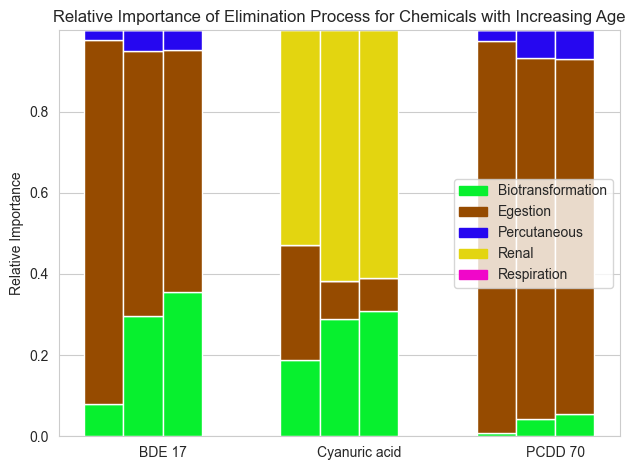

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

data = {
    ('BDE 17', 'Egestion'): [0.895719326, 0.652950115, 0.597515373],
    ('BDE 17', 'Biotransformation'): [0.07948359, 0.295949997, 0.354275401],
    ('BDE 17', 'Respiration'): [6.50902E-07, 7.64612E-07, 7.86722E-07],
    ('BDE 17', 'Percutaneous'): [0.024796278, 0.051098941, 0.048208252],
    ('BDE 17', 'Renal'): [1.5501E-07, 1.82089E-07, 1.87355E-07],
    ('PCDD 70', 'Egestion'): [0.964643831, 0.888834621, 0.87543623],
    ('PCDD 70', 'Biotransformation'): [0.009085444, 0.042764393, 0.055104844],
    ('PCDD 70', 'Respiration'): [2.37556E-05, 3.52725E-05, 3.90617E-05],
    ('PCDD 70', 'Percutaneous'): [0.026245265, 0.068363182, 0.069417061],
    ('PCDD 70', 'Renal'): [1.70465E-06, 2.53109E-06, 2.80299E-06],
    ('Cyanuric acid', 'Egestion'): [0.284080354, 0.092222486, 0.081086771],
    ('Cyanuric acid', 'Biotransformation'): [0.187301785, 0.289436773, 0.308103483],
    ('Cyanuric acid', 'Respiration'): [1.56568E-11, 8.19057E-12, 8.09727E-12],
    ('Cyanuric acid', 'Percutaneous'): [0.000104207, 9.56338E-05, 8.66892E-05],
    ('Cyanuric acid', 'Renal'): [0.528513654, 0.618245108, 0.610723056]
}

# Transform the data into a DataFrame
df = pd.DataFrame(data).T
df.columns = ['Age 3', 'Age 14', 'Age 25']

df = df.sort_index(level=0)

# Define the colors for each elimination route
colors = {
    'Egestion': '#964B00',  # brown, like sh*t
    'Biotransformation': '#07f02e',  # green, succesfully transformed
    'Respiration': '#f007c9',  # pink, like lungs (how they should be)
    'Percutaneous': '#2607f0',  # blue, like sweat
    'Renal': '#e3d510'  # yellow, like urine
}

# Create a grouped stacked bar plot
fig, ax = plt.subplots()
width = 0.2  # (Bar) width
x = np.arange(len(df.index.levels[0]))  # The x locations for the groups

# List to store the patches for the legend
legend_patches = []

# Create a dictionary to store the bottom of each bar
bottoms = {age: {chemical: 0 for chemical in df.index.levels[0]} for age in df.columns}

for i, age in enumerate(df.columns):
    for j, (chemical, process) in enumerate(df.index):
        bar = ax.bar(x[j // 5] + i * width, df.loc[(chemical, process), age], width, bottom=bottoms[age][chemical], color=colors[process])
        bottoms[age][chemical] += df.loc[(chemical, process), age]
        # Add the patch to the list if it hasn't been added yet
        if process not in [patch.get_label() for patch in legend_patches]:
            legend_patches.append(Patch(color=colors[process], label=process))

# Add the legend
ax.legend(handles=legend_patches)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Importance')
ax.set_title('Relative Importance of Elimination Process for Chemicals with Increasing Age')
ax.set_xticks(x + width * len(df.columns) / 2)
ax.set_xticklabels(df.index.levels[0])

fig.tight_layout()
plt.show()

## [References](References)

**Main teaching and structure of analysis taught through course lecture notes found at: @ github C4PB3**
Specifically:
- W1: Intro to NumPy
- W2: Linear Algebra
- W2: Introduction to MatPlotLib
- W9: RDKit

**Official Documentation from their websites** 
- NumPy
- Pandas
- Matplotlib
- Seaborn
- Scikit
- Pubchempy
- RDKit

And of course, Open AI's ChatGPT and GitHub CoPilot as my own personal coding assistant from quick code debugging to some idea generation.
